<a href="https://colab.research.google.com/github/JonaBaron/MNIST-dataset/blob/main/Project1_COMP472.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1
In this project, you will develop a machine learning app that classifies handwritten digits (0–9) from the
MNIST dataset. You will need to use at least 2 libraries:
1. NumPy for data exploration and manipulation.
2. scikit-learn to build a simple baseline model using logistic regression

##Import the data

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [116]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

In [117]:
x_train_raw.shape, y_train_raw.shape

((60000, 28, 28), (60000,))

In [118]:
x_test_raw.shape, y_test_raw.shape

((10000, 28, 28), (10000,))

In [119]:
label_unique = np.unique(y_train_raw)
label_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

##Visualize the data

In [120]:
## Transfert to numpy
x_train = np.array(x_train_raw)
y_train = np.array(y_train_raw)
x_test = np.array(x_test_raw)
y_test = np.array(y_test_raw)

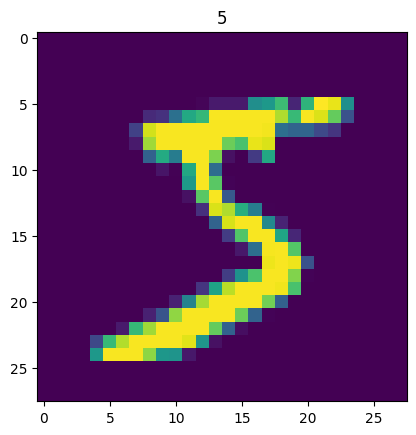

In [121]:
## See the data
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

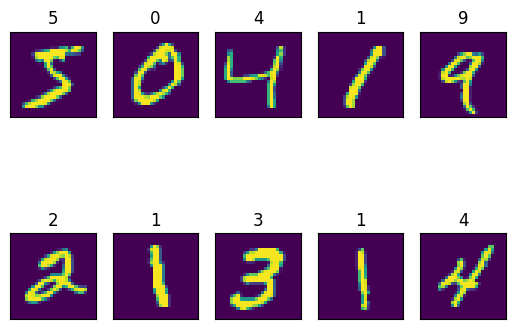

In [122]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

##Reshape the data and create the model

In [123]:
# import the class
from sklearn.linear_model import LogisticRegression
import numpy as np # Ensure numpy is imported

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# Reshape the training and testing data to be 2-dimensional
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)


# fit the model with data
logreg.fit(x_train_reshaped, y_train)

# Predict using the reshaped test data
y_pred = logreg.predict(x_test_reshaped)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Visualize the prediction

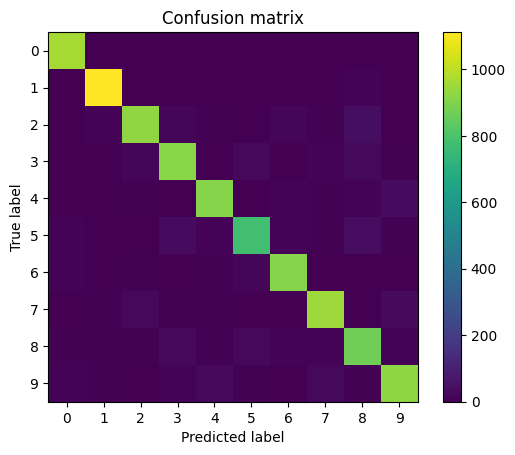

In [133]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cnf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(10), label_unique)
plt.yticks(np.arange(10), label_unique)
plt.show()

Text(0.5, 427.9555555555555, 'Predicted label')

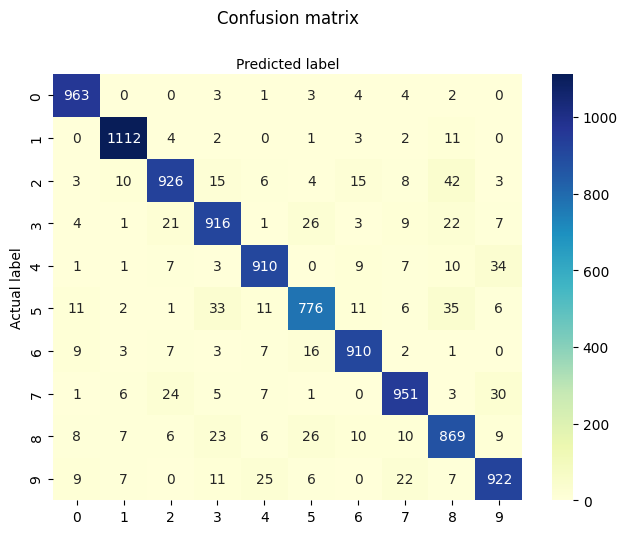

In [134]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
tick_marks = np.arange(len(label_unique))
plt.xticks(tick_marks, label_unique)
plt.yticks(tick_marks, label_unique)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


##See the metrics to see the model accuracy

In [125]:
from sklearn.metrics import classification_report
import pandas as pd

target_names = pd.Series(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

